<div style="display: flex; background-color: RGB(255,114,0);" >
<h1 style="margin: auto; padding: 30px; ">ANALYSE DU STOCK ET DES VENTES DU SITE BOTTLENECK</h1>
</div>

# OBJECTIF DE CE NOTEBOOK

Bienvenue dans l'outil plébiscité par les analystes de données Jupyter.

Il s'agit d'un outil permettant de mixer et d'alterner codes, textes et graphique.

Cet outil est formidable pour plusieurs raisons:

+ il permet de tester des lignes de codes au fur et à mesure de votre rédaction, de constater immédiatement le résultat d'un instruction, de la corriger si nécessaire.
+ De rédiger du texte pour expliquer l'approche suivie ou les résultats d'une analyse et de le mettre en forme grâce à du code html ou plus simple avec **Markdown**
+ d'agrémenter de graphiques

Pour vous aider dans vos premiers pas à l'usage de Jupyter et de Python, nous avons rédigé ce notebook en vous indiquant les instructions à suivre.

Il vous suffit pour cela de saisir le code Python répondant à l'instruction donnée.

Vous verrez de temps à autre le code Python répondant à une instruction donnée mais cela est fait pour vous aider à comprendre la nature du travail qui vous est demandée.

Et garder à l'esprit, qu'il n'y a pas de solution unique pour résoudre un problème et qu'il y a autant de résolutions de problèmes que de développeurs ;)...



<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 1 - Importation des librairies et chargement des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.1 - Importation des librairies</h3>
</div>

In [80]:
#Importation de la librairie Pandas
import pandas as pd

In [81]:
#Importation de la librairie plotly express
import plotly.express as px


In [82]:
#Trouver dans Google l'instruction permettant d'afficher toutes les colonnes d'un dataframe
#Saisir, dans Google, les mots clés "display all columns dataframe Pandas", par exemple.
#Dans les résultats de la recherche, privilégiez les solutions provenants de Stack Overflow ou Medium
pd.set_option('display.max_columns', None)

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">1.2 - Chargements des fichiers</h3>
</div>

In [83]:
import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='openpyxl')

#Importation du fichier web.xlsx
df_web = pd.read_excel("web.xlsx")

#Importation du fichier erp.xlsx
df_erp = pd.read_excel("erp.xlsx")

#importation du fichier liaison.xlsx
df_liaison = pd.read_excel("liaison.xlsx")

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 2 - Analyse exploratoire des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1 - Analyse exploratoire du fichier erp.xlsx</h3>
</div>

In [84]:
#Afficher les dimensions du dataset
print("Le tableau comporte {} observation(s) ou article(s)".format(df_erp.shape[0]))
print("Le tableau comporte {} colonne(s)".format(df_erp.shape[1]))


Le tableau comporte 825 observation(s) ou article(s)
Le tableau comporte 6 colonne(s)


In [85]:
#Consulter le nombre de colonnes
nombre_de_colonnes = len(df_erp.columns)
print(f"Le tableau comporte {nombre_de_colonnes} colonne(s)\n")

#La nature des données dans chacune des colonnes
natures_donnees = df_erp.dtypes
print("nature de données :\n")
print(natures_donnees)

#Le nombre de valeurs présentes dans chacune des colonnes
nombre_de_valeurs = df_erp.count()
print("Nombre de valeurs non nulles dans chaque colonne :\n")
print(nombre_de_valeurs)


Le tableau comporte 6 colonne(s)

nature de données :

product_id          int64
onsale_web          int64
price             float64
stock_quantity      int64
stock_status       object
purchase_price    float64
dtype: object
Nombre de valeurs non nulles dans chaque colonne :

product_id        825
onsale_web        825
price             825
stock_quantity    825
stock_status      825
purchase_price    825
dtype: int64


In [86]:
#Afficher les 5 premières lignes de la table
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,outofstock,23.77


In [87]:
#Vérifier si il y a les lignes en doublons dans la colonne product_id
doublons = df_erp['product_id'].duplicated()

# Afficher les indices des doublons
indices_doublons = df_erp[doublons].index
print(f"Indices des lignes avec des doublons dans 'product_id' : {indices_doublons.tolist()}"" donc pas de doublons!")


Indices des lignes avec des doublons dans 'product_id' : [] donc pas de doublons!


Valeurs distinctes dans stock_status : ['instock' 'outofstock']



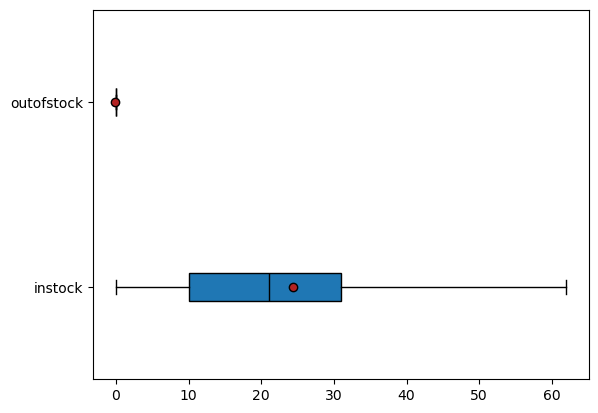

In [88]:
#Afficher les valeurs distinctes de la colonne stock_status
valeurs_distinctes = df_erp['stock_status'].unique()
print(f"Valeurs distinctes dans stock_status : {valeurs_distinctes}\n")

#À quelle(s) autre(s) colonne(s) sont-elles liées ?

groupes = []
for v in valeurs_distinctes:
    groupes.append(df_erp[df_erp['stock_status']==v]['stock_quantity'])

# visualiser la distribution de la colonne stock_quantity selon les différentes valeurs distinctes de la colonne stock_status.
import matplotlib.pyplot as plt

# Propriétés graphiques (pas très importantes)    
medianprops = {'color':"black"}
meanprops = {'marker':'o', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}
    
plt.boxplot(groupes, labels=valeurs_distinctes, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()


Les colonnes 'stock_status' et 'stock_quantity' sont liés, car :
La valeur distincte "outofstock" est associé à des quantités de stock faibles ou nulles, 
ce qui est évident dans la boîte à moustaches qui montre une faible variabilité et une médiane proche de zéro.
La valeur distincte "instock", en revanche, est associé à une plus grande variabilité des quantités de stock, 
ce qui montre que les produits disponibles en stock peuvent avoir des niveaux de stock très variés,
en fonction de la demande, des approvisionnements ou des stratégies de gestion des stocks.

In [89]:
#Création d'une colonne "stock_status_2
#La valeur de cette deuxième colonne sera fonction de la valeur dans la colonne "stock_quantity"
#si la valeur de la colonne "stock_quantity" est nulle renseigner "outofstock" sinon mettre "instock"

df_erp['stock_status_2'] = df_erp['stock_quantity'].apply(lambda x: 'outofstock' if pd.isna(x) or x == 0 else 'instock')

# Afficher le résultat pour vérification
print(df_erp[['stock_quantity', 'stock_status_2']].head())


   stock_quantity stock_status_2
0              16        instock
1              10        instock
2               0     outofstock
3              26        instock
4               3        instock


In [90]:
#Vérifions que les 2 colonnes sont identiques:
#Les 2 colonnes sont strictement identiques si les valeurs de chaque ligne sont strictement identiques 2 à 2

#La comparaison de 2 colonnes peut se réaliser simplement avec l'instruction ci-dessous:
df_erp["stock_status"] == df_erp["stock_status_2"]
#Le résultat est l'affichage de True ou False pour chacune des lignes du dataset
#C'est un bon début, mais difficile à exploiter


0       True
1       True
2       True
3       True
4      False
       ...  
820     True
821     True
822     True
823     True
824     True
Length: 825, dtype: bool

In [91]:
#Mais il est possible de synthétiser ce résultat en effectuant la somme de cette colonne:
#True vaut 1 et False 0

#Nous devrions obtenir la somme de 824 qui correspond au nombre de lignes dans ce dataset
comparaison_colonnes = df_erp["stock_status"] == df_erp["stock_status_2"]
comparaison_colonnes.sum()


821

La somme de la colonne comparaison est de 821, ce qui diffère de la somme 825 (qui correspond au nombre de lignes dans ce dataset), 
confirmant que les colonnes "stock_status" et "stock_status_2" ne sont pas identiques.

In [92]:
#Si les colonnes ne sont absolument pas identiques ligne à ligne alors identifier la ligne en écart
lignes_écart = df_erp[df_erp["stock_status"] != df_erp["stock_status_2"]]

# Afficher les indices des lignes en écart
print(f"Indices des lignes avec des écarts : {lignes_écart.index.tolist()}\n")

# Afficher les lignes avec des écarts
print(f"les lignes avec des écarts :\n")
print(lignes_écart[['stock_status', 'stock_status_2']])


Indices des lignes avec des écarts : [4, 398, 449, 573]

les lignes avec des écarts :

    stock_status stock_status_2
4     outofstock        instock
398      instock     outofstock
449   outofstock        instock
573   outofstock        instock


In [93]:
#Corriger la ou les données incohérentes
# Identification des incohérences entre 'stock_status' et 'stock_status_2'
incoherences = df_erp[df_erp['stock_status'] != df_erp['stock_status_2']]

print("Données incohérentes avant correction :")
print(incoherences[['stock_status', 'stock_status_2', 'stock_quantity']])

# Correction des incohérences : on considère que 'stock_status_2' est la référence correcte
df_erp.loc[df_erp['stock_status'] != df_erp['stock_status_2'], 'stock_status'] = df_erp['stock_status_2']

# Vérification des incohérences après correction
incoherences_apres = df_erp[df_erp['stock_status'] != df_erp['stock_status_2']]

print("\nNombre d'incohérences restantes après correction : ", len(incoherences_apres))
print("Si le nombre est 0, toutes les incohérences ont été corrigées.")

#Verification en utilisant le même code que plus haut pour afficher les problemes
# Identification des incohérences entre 'stock_status' et 'stock_status_2'
incoherences = df_erp[df_erp['stock_status'] != df_erp['stock_status_2']]

print("Données incohérentes avant correction :")
print(incoherences[['stock_status', 'stock_status_2', 'stock_quantity']])

# Correction des incohérences : on considère que 'stock_status_2' est la référence correcte
df_erp.loc[df_erp['stock_status'] != df_erp['stock_status_2'], 'stock_status'] = df_erp['stock_status_2']

# Vérification des incohérences après correction
incoherences_apres = df_erp[df_erp['stock_status'] != df_erp['stock_status_2']]

print("\nNombre d'incohérences restantes après correction : ", len(incoherences_apres))
print("Si le nombre est 0, toutes les incohérences ont été corrigées.")


Données incohérentes avant correction :
    stock_status stock_status_2  stock_quantity
4     outofstock        instock               3
398      instock     outofstock               0
449   outofstock        instock             -10
573   outofstock        instock              -1

Nombre d'incohérences restantes après correction :  0
Si le nombre est 0, toutes les incohérences ont été corrigées.
Données incohérentes avant correction :
Empty DataFrame
Columns: [stock_status, stock_status_2, stock_quantity]
Index: []

Nombre d'incohérences restantes après correction :  0
Si le nombre est 0, toutes les incohérences ont été corrigées.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1 - Analyse exploratoire de chaque variable du fichier erp.xlsx</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.1 - Analyse de la variable PRIX</h3>
</div>

In [94]:
###############
## LES PRIX  ##
###############

#Vérification des prix: Y a t-il des prix non renseignés, négatif ou nul?

#1. Vérification des prix non renseignés (valeurs manquantes)
prix_non_renseigne =  df_erp['price'].isna().sum()

#2. Vérification des prix négatifs
prix_negatifs = df_erp[df_erp['price'] < 0]

#3. Vérification des prix égaux à 0
prix_nuls = df_erp[df_erp['price'] == 0]

#Afficher le ou les prix non renseignés dans la colonne "price"
print(f"Nombre d'articles avec un prix non renseigné : {prix_non_renseigne}\n")

#Afficher le prix minimum de la colonne "price"
print(f"Le prix minimum dans la colonne 'price' est : {df_erp['price'].min()}\n")

#Afficher le prix maximum de la colonne "price"
print(f"Le prix maximum dans la colonne 'price' est : {df_erp['price'].max()}\n")

#Affichier les prix inférieurs à 0
print(f"Articles avec un prix inférieur à 0 :\n")
print(prix_negatifs[['product_id', 'price']])

#supprimer les prix négatifs pour corriger l'incohérence dans dans la colonne 'price'.
# Filtrer et conserver uniquement les prix >= 0
df_erp = df_erp[df_erp['price'] >= 0]

# Réinitialiser l'index pour un index propre après suppression
df_erp = df_erp.reset_index(drop=True)


Nombre d'articles avec un prix non renseigné : 0

Le prix minimum dans la colonne 'price' est : -20.0

Le prix maximum dans la colonne 'price' est : 225.0

Articles avec un prix inférieur à 0 :

     product_id  price
151        4233  -20.0
469        5017   -8.0
739        6594   -9.1


Pour corriger l'incohérence dans dans la colonne 'price' J'ai décidé de supprimer les prix négatifs 

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.2 - Analyse de la variable STOCK</h3>
</div>

In [95]:
#######################
### stock_quantity  ###
#######################

#Vérification de la colonne stock quantity

#Afficher la quantité minimum de la colonne "stock_quantity"
print(f"La quantité minimum dans la colonne 'stock_quantity' est : {df_erp['stock_quantity'].min()}\n")

#Afficher la quantité maximum de la colonne "stock_quantity"
print(f"La quantité maximum dans la colonne 'stock_quantity' est : {df_erp['stock_quantity'].max()}\n")

#Affichier les stocks inférieurs à 0 (qu'est ce qu'il faut en faire ?)
stocks_negatifs = df_erp[df_erp['stock_quantity'] < 0]
print("Articles avec un stock inférieur à 0 :\n")
print(stocks_negatifs[['product_id', 'stock_quantity']])

# rmplacer les stocks négatifs par la valeur 0 pour éviter des biais ou des résultats incorrects.
df_erp['stock_quantity'] = df_erp['stock_quantity'].where(df_erp['stock_quantity'] >= 0, 0)


La quantité minimum dans la colonne 'stock_quantity' est : -10

La quantité maximum dans la colonne 'stock_quantity' est : 145

Articles avec un stock inférieur à 0 :

     product_id  stock_quantity
448        4973             -10
571        5700              -1


J'ai remplacé les valeurs des stocks negatifs par 0

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.3 - Analyse de la variable ONSALE_WEB</h3>
</div>

In [96]:
#Vérification de la colonne onsale_web et des valeurs qu'elle contient? Que signifient-elles?
valeurs_onsale_web = df_erp['onsale_web'].unique()

print("Valeurs uniques dans la colonne 'onsale_web' :")
print(valeurs_onsale_web)
df_erp['onsale_web'].unique()

# Filtrer les produits qui sont disponibles en ligne (onsale_web = 1)
produits_en_ligne = df_erp[df_erp['onsale_web'] == 1]

# Compter le nombre de produits disponibles en ligne
nombre_produits_en_ligne = produits_en_ligne.shape[0]
print(f"Nombre de produits disponibles à la vente en ligne : {nombre_produits_en_ligne}") 

# Calcul du pourcentage de produits en ligne
# Nombre total de produits
nombre_total_produits = df_erp.shape[0]
pourcentage_produits_en_ligne = (nombre_produits_en_ligne / nombre_total_produits) * 100
print(f"Pourcentage de produits disponibles à la vente en ligne : {pourcentage_produits_en_ligne:.2f}%")

# Filtrer les produits qui ne sont pas disponibles en ligne (onsale_web = 0)
produits_hors_ligne = df_erp[df_erp['onsale_web'] == 0]
# Compter le nombre de produits hors ligne
nombre_produits_hors_ligne = produits_hors_ligne.shape[0]
print(f"Nombre de produits non disponibles à la vente en ligne : {nombre_produits_hors_ligne}")

# Filtrer les produits en stock mais non disponibles en ligne
produits_hors_ligne_en_stock = df_erp[(df_erp['stock_quantity'] > 0) & (df_erp['onsale_web'] == 0)]

# Compter le nombre de produits en stock mais non disponibles en ligne
nombre_produits_hors_ligne_en_stock = produits_hors_ligne_en_stock.shape[0]

# Affichage du résultat
print(f"Nombre de produits en stock mais non disponibles en ligne : {nombre_produits_hors_ligne_en_stock}")

#Quelles sont les colonnes à conserver selon vous? 
# La colonne onsale_web contient deux valeurs [1, 0] cela signifierait que 0 et 1 représentent respectivement les articles non disponibles et 
#disponibles sur le site web.
#Les colonnes à conserver à mon avis sont:['product_id','onsale_web','price','stock_quantity','stock_status','purchase_price'].

Valeurs uniques dans la colonne 'onsale_web' :
[1 0]
Nombre de produits disponibles à la vente en ligne : 716
Pourcentage de produits disponibles à la vente en ligne : 87.10%
Nombre de produits non disponibles à la vente en ligne : 106
Nombre de produits en stock mais non disponibles en ligne : 64


Sur les 106 produits qui ne sont pas disponibles à la vente en ligne, 64 sont en stock. 
Il serait donc judicieux de les mettre en ligne afin de maximiser les opportunités de vente.

In [97]:
#Supprimer la colonne comportant le libellé "stock_status_2" car elle est redondante 
#avec la colonne "stock_status".
df_erp = df_erp.drop(columns=['stock_status_2'])
df_erp.head()

,product_id,onsale_web,price,stock_quantity,stock_status,purchase_price
0,3847,1,24.2,16,instock,12.88
1,3849,1,34.3,10,instock,17.54
2,3850,1,20.8,0,outofstock,10.64
3,4032,1,14.1,26,instock,6.92
4,4039,1,46.0,3,instock,23.77


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.1.1.4 - Analyse de la variable prix d'achat</h3>
</div>

In [98]:
######################
##   prix d'achat   ##
######################

#Vérification de la colonne purchase_price : 

#Afficher le ou les prix non renseignés dans la colonne "purchase_price"
prix_non_renseigne = df_erp[df_erp['purchase_price'].isna()]
print("Articles avec un prix non renseigné dans 'purchase_price' :")
print(prix_non_renseigne[['product_id', 'purchase_price']])

#Afficher le prix minimum de la colonne "purchase_price"
prix_minimum = df_erp['purchase_price'].min()
print(f"Le prix minimum dans la colonne 'purchase_price' est : {prix_minimum }\n")

#Afficher le prix maximum de la colonne "purchase_price"
prix_maximum = df_erp['purchase_price'].max()
print(f"Le prix maximum dans la colonne 'purchase_price' est : {prix_maximum}\n")


Articles avec un prix non renseigné dans 'purchase_price' :
Empty DataFrame
Columns: [product_id, purchase_price]
Index: []
Le prix minimum dans la colonne 'purchase_price' est : 2.74

Le prix maximum dans la colonne 'purchase_price' est : 137.81



<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.2 - Analyse exploratoire du fichier web.xlsx</h3>
</div>
 

In [99]:
#Dimension du dataset
dimension = df_web.shape
print(f"la dimension du dataset est: {dimension}")

#Nombre d'observations
nombre_observations = df_web.shape[0]
print(f"Le nombre d'observations dans la DataFrame df_web est : {nombre_observations}")

#Nombre de caractéristiques
nombre_de_colonnes = df_web.shape[1]
print(f"Nombre de caractéristiques : {nombre_de_colonnes}")


la dimension du dataset est: (1513, 29)
Le nombre d'observations dans la DataFrame df_web est : 1513
Nombre de caractéristiques : 29


In [100]:
#Consulter le nombre de colonnes
nombre_de_colonnes = len(df_web.columns)
print(f"Le tableau comporte {nombre_de_colonnes} colonne(s)\n")

#La nature des données dans chacune des colonnes
nature_donnees_web = df_web.dtypes
print("Nature des données dans chaque colonne du dataset df_web :")
print(nature_donnees_web)

#Le nombre de valeurs présentes dans chacune des colonnes
nombre_valeurs_par_colonne = df_web.count()
print("Nombre de valeurs présentes dans chaque colonne du dataset df_web :")
print(nombre_valeurs_par_colonne)


Le tableau comporte 29 colonne(s)

Nature des données dans chaque colonne du dataset df_web :
sku                              object
virtual                           int64
downloadable                      int64
rating_count                      int64
average_rating                  float64
total_sales                     float64
tax_status                       object
tax_class                       float64
post_author                     float64
post_date                datetime64[ns]
post_date_gmt            datetime64[ns]
post_content                    float64
product_type                     object
post_title                       object
post_excerpt                     object
post_status                      object
comment_status                   object
ping_status                      object
post_password                   float64
post_name                        object
post_modified            datetime64[ns]
post_modified_gmt        datetime64[ns]
post_content_filtered     

Selon vous, quelles sont les colonnes à conserver ?
Les colonnes à conserver sont: ['sku','total_sales', 'product_type', 'post_title', 'post_name' ]

In [101]:
#Si vous avez défini des colonnes à supprimer, effectuer l'opération
df_web = df_web.drop(columns = ['virtual', 'downloadable', 'rating_count', 'average_rating', 'tax_status', 'tax_class', 'post_author',             
'post_date', 'post_date_gmt', 'post_content', 'post_excerpt', 'post_status', 'comment_status', 'ping_status','post_password',           
'post_modified', 'post_modified_gmt', 'post_content_filtered', 'post_parent', 'guid', 'menu_order', 'post_type', 'post_mime_type','comment_count'])

In [102]:
#df_web.head()

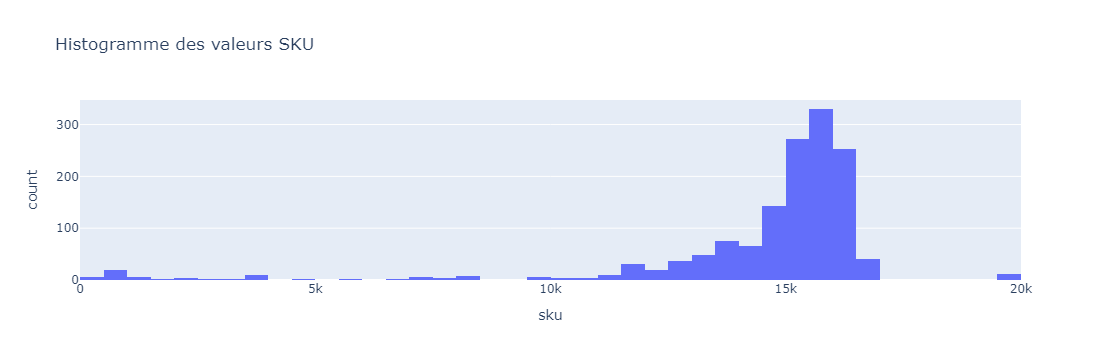

In [103]:
#Visualisation des valeurs de la colonne sku
fig = px.histogram(df_web, x='sku', title='Histogramme des valeurs SKU')
fig.show()

#Quelles sont les valeurs qui ne semblent pas respecter la régle de codification?
# Fonction pour vérifier si un élément est un nombre
def is_number(x):
    try:
        int(x)  # Conversion en entier (ou float si nécessaire)
        return True
    except (ValueError, TypeError):  # Capture des erreurs de conversion et des types non valides
        return False

# Appliquer la fonction sur la colonne 'sku'
df_web["is_number"] = df_web["sku"].apply(is_number)


In [104]:
#Si vous avez identifié des codes articles ne respectant pas la régle de codification, consultez-les?
df_invalid_sku = df_web[~df_web["is_number"] & df_web["sku"].notna()]

# Afficher les résultats
print(df_invalid_sku)


                      sku  total_sales product_type  \
272               13127-1          4.0          Vin   
842   bon-cadeau-25-euros          7.0        Autre   
1117              13127-1          4.0          Vin   
1387  bon-cadeau-25-euros          7.0          NaN   

                                        post_title  \
272   Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
842                              Bon cadeau de 25€   
1117  Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
1387                             Bon cadeau de 25€   

                                           post_name  is_number  
272   clos-du-mont-olivet-chateauneuf-du-pape-2007-2      False  
842                           bon-cadeau-de-25-euros      False  
1117  clos-du-mont-olivet-chateauneuf-du-pape-2007-2      False  
1387                          bon-cadeau-de-25-euros      False  


In [105]:
# Correction manuelle des valeurs non conformes
df_web.loc[df_web["sku"] == '13127-1', "sku"] = '10020'
# Correction manuelle des valeurs non conformes
df_web.loc[df_web["sku"] == 'bon-cadeau-25-euros', "sku"] = '10021'


In [106]:
print(df_invalid_sku)

                      sku  total_sales product_type  \
272               13127-1          4.0          Vin   
842   bon-cadeau-25-euros          7.0        Autre   
1117              13127-1          4.0          Vin   
1387  bon-cadeau-25-euros          7.0          NaN   

                                        post_title  \
272   Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
842                              Bon cadeau de 25€   
1117  Clos du Mont-Olivet Châteauneuf-du-Pape 2007   
1387                             Bon cadeau de 25€   

                                           post_name  is_number  
272   clos-du-mont-olivet-chateauneuf-du-pape-2007-2      False  
842                           bon-cadeau-de-25-euros      False  
1117  clos-du-mont-olivet-chateauneuf-du-pape-2007-2      False  
1387                          bon-cadeau-de-25-euros      False  


In [107]:
#Identifier les lignes sans code articles
missing_sku_rows = df_web[df_web['sku'].isnull() | df_web['sku'].eq('')]

In [108]:
#Pour les codes articles identifiés, réalisé une analyse et définissez l'action à entreprendre
total_rows = len(df_web)
missing_sku_count = len(missing_sku_rows)
print(f"Nombre de lignes sans SKU : {missing_sku_count}")


Nombre de lignes sans SKU : 85


In [109]:
#Supprimer les lignes sans SKU
df_web = df_web.dropna(subset=['sku']).reset_index(drop=True)

#Vérification
print(f"Nombre de lignes après suppression des SKU manquants : {len(df_web)}")


Nombre de lignes après suppression des SKU manquants : 1428


In [110]:
#La clé pour chaque ligne est-elle uniques? ou autrement dit, y a-t-il des doublons?
duplicate_skus = df_web[df_web.duplicated(subset=['sku'], keep=False)]

In [111]:
#Supprimer les doublons dans la colonne 'sku' et garder la première occurrence
df_web = df_web.drop_duplicates(subset=['sku'], keep='first')

# Afficher les doublons 
print(duplicate_skus)

        sku  total_sales product_type  \
0     11862          3.0          Vin   
1     16057          5.0          Vin   
2     14692          5.0          Vin   
3     16295         14.0          Vin   
4     15328          2.0          Vin   
...     ...          ...          ...   
1423  16326          5.0          Vin   
1424  15662         15.0          Vin   
1425  15329          3.0          Vin   
1426  14827          7.0          Vin   
1427  16004          5.0          Vin   

                                             post_title  \
0                     Gilles Robin Hermitage Rouge 2012   
1     Domaine Pellé Sancerre Rouge La Croix Au Garde...   
2         Château Fonréaud Bordeaux Blanc Le Cygne 2016   
3     Moulin de Gassac IGP Pays d'Hérault Guilhem Ro...   
4                  Agnès Levet Côte Rôtie Maestria 2017   
...                                                 ...   
1423    Camin Larredya Jurançon Moelleux Au Capcéu 2018   
1424  Chermette Domaine du Vissoux 

In [112]:
#Les lignes sans code article semble être toutes non renseignés
#Pour s'en assurer réaliser les étapes suivantes:
#1 - Créer un dataframe avec uniquement les lignes sans code article

df_missing_sku = df_web[df_web['sku'].isnull() | df_web['sku'].eq('')]
# Afficher le nouveau DataFrame contenant les lignes sans SKU
print(df_missing_sku)

#2 - utiliser la fonction df.info() sur ce nouveau dataframe pour observer le nombre de valeur reseigner dans chacune des colonnes
df_missing_sku.info()

#3 - Que constatez-vous?
# On constate que aucune valeur reseigner dans chacune des colonnes de la dataframe df_missing_sku.


Empty DataFrame
Columns: [sku, total_sales, product_type, post_title, post_name, is_number]
Index: []
<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sku           0 non-null      object 
 1   total_sales   0 non-null      float64
 2   product_type  0 non-null      object 
 3   post_title    0 non-null      object 
 4   post_name     0 non-null      object 
 5   is_number     0 non-null      bool   
dtypes: bool(1), float64(1), object(4)
memory usage: 0.0+ bytes


In [113]:
#Correction des types de données pour la variables 'sku' et 'total_sales'.
df_web['sku'] = df_web['sku'].astype(int)
df_web['total_sales'] = pd.to_numeric(df_web['total_sales'], errors='coerce').fillna(0).astype(int)
df_web['total_sales'] = df_web['total_sales'].astype(int)
df_web.info()

<class 'pandas.core.frame.DataFrame'>
Index: 714 entries, 0 to 1310
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   sku           714 non-null    int32 
 1   total_sales   714 non-null    int32 
 2   product_type  714 non-null    object
 3   post_title    714 non-null    object
 4   post_name     714 non-null    object
 5   is_number     714 non-null    bool  
dtypes: bool(1), int32(2), object(3)
memory usage: 28.6+ KB


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">2.3 - Analyse exploratoire du fichier liaison.xlsx</h3>
</div>

In [114]:
#Dimension du dataset
dimension_df_liaison = df_liaison.shape
print(f"La dimension du dataset est : {dimension_df_liaison}")


#Nombre d'observations
nombre_observations = df_liaison.shape[0]
print(f"Le nombre d'observations dans la DataFrame df_liaison est : {nombre_observations}")

#Nombre de caractéristiques
nombre_de_colonnes = df_liaison.shape[1]
print(f"Nombre de caractéristiques : {nombre_de_colonnes}")



La dimension du dataset est : (825, 2)
Le nombre d'observations dans la DataFrame df_liaison est : 825
Nombre de caractéristiques : 2


In [115]:
#Consulter le nombre de colonnes
nombre_de_colonnes = df_liaison.shape[1]
print(nombre_de_colonnes)

#La nature des données dans chacune des colonnes
types_de_donnees = df_liaison.dtypes
print(types_de_donnees)

#Le nombre de valeurs présentes dans chacune des colonnes
valeurs_presentes = df_liaison.count()
print(valeurs_presentes)


2
id_web        object
product_id     int64
dtype: object
id_web        734
product_id    825
dtype: int64


Correction des erreurs de typologie dans la colonne id_web.

In [116]:
#Remplacer les valeurs non numériques par NaN dans la colonne id_web
df_liaison['id_web'] = df_liaison['id_web'].fillna(0)

# Remplacer les valeurs non numériques par 0
df_liaison['id_web'] = df_liaison['id_web'].apply(lambda x: x if str(x).isdigit() else 0)

# convertir 'id_web' en int 
df_liaison['id_web'] = pd.to_numeric(df_liaison['id_web'], errors='coerce').astype(int)
print (df_liaison['id_web'].dtype)


int32


In [117]:
#Les valeurs de la colonne "product_id" sont elles toutes uniques?
toutes_uniques = df_liaison['product_id'].is_unique
print(f"Toutes les valeurs de 'product_id' sont uniques : {toutes_uniques}")


Toutes les valeurs de 'product_id' sont uniques : True


In [118]:
#Les valeurs de la colonne "id_web" sont-elles toutes uniques?
toutes_uniques = df_liaison['id_web'].is_unique
print(f"Toutes les valeurs de 'id_web' sont uniques : {toutes_uniques}")


Toutes les valeurs de 'id_web' sont uniques : False


Traitement des valeurs manquantes et des doublons dans la colonne id_web

In [119]:
nombre_valeurs_manquantes = df_liaison['id_web'].isna().sum()
print(f"Nombre de valeurs manquantes dans la colonne id_web : {nombre_valeurs_manquantes}")

nombre_valeurs_manquantes = df_liaison['product_id'].isna().sum()
print(f"Nombre de valeurs manquantes dans la colonne product_id : {nombre_valeurs_manquantes}")


Nombre de valeurs manquantes dans la colonne id_web : 0
Nombre de valeurs manquantes dans la colonne product_id : 0


In [120]:
# Supprimer les doublons 
df_liaison = df_liaison.drop_duplicates(subset='id_web', keep='first')

In [121]:
toutes_uniques = df_liaison['id_web'].is_unique
print(f"Toutes les valeurs de 'id_web' sont uniques : {toutes_uniques}")

Toutes les valeurs de 'id_web' sont uniques : True


In [122]:
#La nature des données dans chacune des colonnes
types_de_donnees = df_liaison.dtypes
print(types_de_donnees)
#Le nombre de valeurs présentes dans chacune des colonnes
valeurs_presentes = df_liaison.count()
print(valeurs_presentes)


id_web        int32
product_id    int64
dtype: object
id_web        732
product_id    732
dtype: int64


In [123]:
#Avons-nous des articles sans correspondances?

# Vérification des articles sans correspondance entre 'product_id' et 'id_web'
articles_sans_correspondance = df_liaison[~df_liaison['product_id'].isin(df_liaison['id_web'])]

# Compter le nombre d'articles sans correspondance
nombre_articles_sans_correspondance = articles_sans_correspondance.shape[0]
print(f"Nombre d'articles sans correspondance : {nombre_articles_sans_correspondance}")


Nombre d'articles sans correspondance : 730


<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 3 - Jonction des fichiers</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.1 - Jonction du fichier df_erp et df_liaison</h3>
</div>

In [124]:
#Fusion des fichiers df_erp et df_liaison
df_merge = pd.merge(df_erp, df_liaison, on='product_id', how='outer')

In [125]:
#Y a t-il des lignes ne "matchant" entre les 2 fichiers?

sans_correspondance_erp = df_erp[~df_erp['product_id'].isin(df_liaison['product_id'])]
# Nombre de lignes sans correspondance
nombre_sans_correspondance_erp = sans_correspondance_erp.shape[0]
print(f"Nombre de lignes dans df_erp sans correspondance dans df_liaison : {nombre_sans_correspondance_erp}")

sans_correspondance_liaison = df_liaison[~df_liaison['product_id'].isin(df_erp['product_id'])]
# Nombre de lignes sans correspondance
nombre_sans_correspondance_liaison = sans_correspondance_liaison.shape[0]
print(f"Nombre de lignes dans df_liaison sans correspondance dans df_erp : {nombre_sans_correspondance_liaison}")


Nombre de lignes dans df_erp sans correspondance dans df_liaison : 90
Nombre de lignes dans df_liaison sans correspondance dans df_erp : 0


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 3.2 - Jonction du fichier df_merge et df_web</h3>
</div>

In [126]:
#Fusionnez les datasets df_merge et df_web

#Fusionner les DataFrames en utilisant 'id_web' de df_merge et 'sku' de df_web
merged_df = pd.merge(df_merge, df_web, left_on='id_web', right_on='sku', how='outer')


In [127]:
#Avons-nous des lignes sans correspondances?

# Nombre de lignes sans correspondance dans df_merge
print(f"Lignes sans correspondance dans df_merge: {merged_df['id_web'].isna().sum()}")

# Nombre de lignes sans correspondance dans df_web
print(f"Lignes sans correspondance dans df_web: {merged_df['sku'].isna().sum()}")


Lignes sans correspondance dans df_merge: 92
Lignes sans correspondance dans df_web: 110


In [128]:
#merged_df

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 4 - Analyse univarié des prix</h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.1 - Exploration par la visualisation de données</h3>
</div>

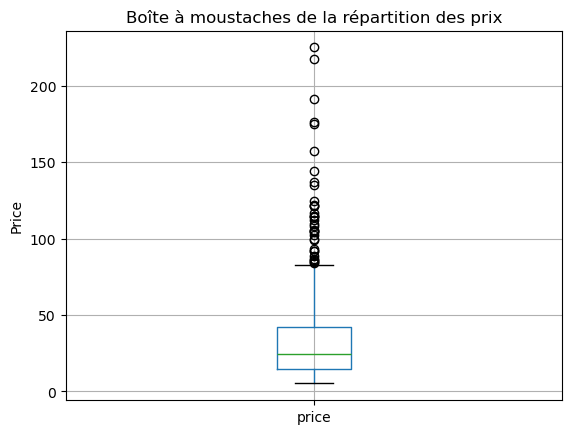

In [129]:
#Création d'une Boite à moustache de la répartition des prix grâce à Pandas
df_erp.boxplot(column='price')

# Ajouter un titre et des labels
plt.title('Boîte à moustaches de la répartition des prix')
plt.ylabel("Price")

# Afficher le graphique
plt.show()


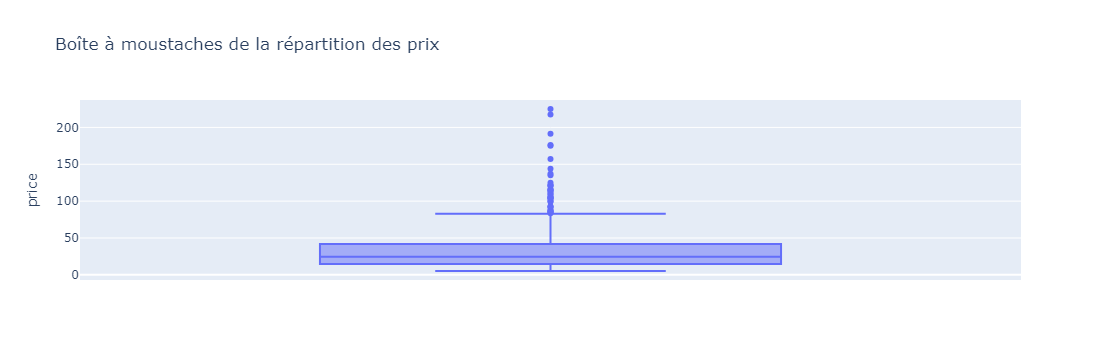

In [130]:
#Autre méthode avec plotly express
fig = px.box(df_erp, y='price', title='Boîte à moustaches de la répartition des prix')

# Afficher le graphique interactif
fig.show()


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2 - Exploration par l'utisation de méthodes statistique</h3>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.1 - Identification par le Z-index</h3>
</div>

In [131]:
#Calculer la moyenne du prix
moyenne_prix = df_erp['price'].mean()

# Afficher la moyenne du prix
print(f'La moyenne du prix est : {moyenne_prix:,.2f}')

#Calculer l'écart-type du prix
ecart_type_prix = df_erp['price'].std()

# Afficher l'écart-type
print(f"L'écart-type du prix est : {ecart_type_prix:,.2f}\n")

#Calculer le Z-score
df_erp['z_score_prix'] = (df_erp['price'] - moyenne_prix) / ecart_type_prix

# Afficher le DataFrame avec le Z-score ajouté
print(df_erp['z_score_prix'].head())


La moyenne du prix est : 32.35
L'écart-type du prix est : 26.62

0   -0.306144
1    0.073235
2   -0.433856
3   -0.685523
4    0.512714
Name: z_score_prix, dtype: float64


In [132]:
#Quel est le seuil prix dont z-score est supérieur à 3?
prix_seuil = df_erp[df_erp['z_score_prix'] > 3]['price']

# Afficher le seuil
print(f"Les prix dont le Z-score est supérieur à 3 sont : {prix_seuil.tolist()}")


Les prix dont le Z-score est supérieur à 3 sont : [225.0, 176.0, 157.0, 144.0, 137.0, 217.5, 124.8, 175.0, 191.3, 122.0, 114.0, 135.0, 116.4, 115.0, 121.0, 115.0, 121.0]


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 4.2.2 - Identification par l'interval interquartile</h3>
</div>

In [133]:
#Utilisation de la fonction describe de Pandas pour l'etude des mesures de dispersions
df_erp['price'].describe()


count    822.000000
mean      32.350304
std       26.622453
min        5.200000
25%       14.600000
50%       24.400000
75%       42.000000
max      225.000000
Name: price, dtype: float64

In [134]:
#Définissez un seuil pour les articles "outliers" en prix

#calcule des quartiles
Q1 = df_erp['price'].quantile(0.25)
Q3 = df_erp['price'].quantile(0.75)
#calcule IQR
IQR = Q3-Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [135]:
#Définissez le nombre d'articles et la proportion de l'ensemble du catalogue "outliers"

# Filtrer les articles dont le prix est un outlier
outliers = df_erp[(df_erp['price'] < lower_bound) | (df_erp['price'] > upper_bound)]

# print (outliers)
number_of_outliers = outliers.shape[0]  # Le nombre de lignes (outliers)
print(f"Nombre d'outliers : {number_of_outliers}")


Nombre d'outliers : 36


Corrélation entre 'price' et 'purchase_price': 0.97


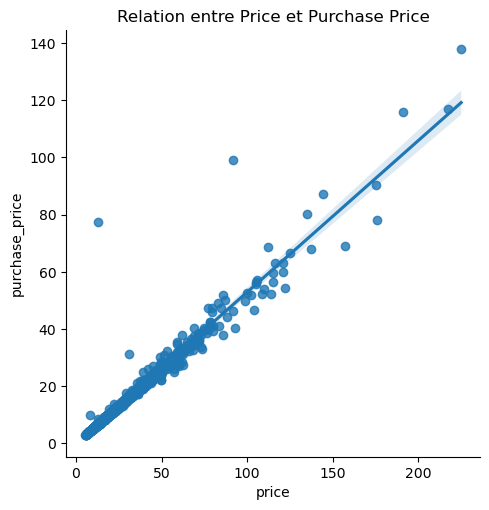

In [136]:
#Selon vous, ces outliers sont-ils justifiés ? 
#Comment le démontrer si cela est possible ?
import seaborn as sns
correlation = df_erp[['price', 'purchase_price']].corr().loc['price', 'purchase_price']

print(f"Corrélation entre 'price' et 'purchase_price': {correlation:.2f}")
sns.lmplot(x='price', y='purchase_price', data=df_erp)
plt.title('Relation entre Price et Purchase Price')
plt.show()


Corrélation entre 'price' et 'purchase_price': 0.97 (forte relation positive entre les deux variables).
L'analyse des corrélations entre price et purchase_price montre qu'un prix de vente plus élevé est lié à un prix d'achat élevé : 
par exmple un vin rare ou haut de gamme coûte naturellement plus cher que la plupart des autres produits.

<div style="background-color: RGB(51,165,182);" >
<h2 style="margin: auto; padding: 20px; color:#fff; ">Etape 5 - Analyse univarié du CA, des quantités vendues, des stocks et de la marge ainsi qu'une analyse multivarié  </h2>
</div>

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.1 - Analyse des ventes en CA</h3>
</div>

In [137]:
##############################
# Calculer le CA su site web #
##############################

#Créez une colonne calculant le CA par article
merged_df['ca_par_article'] = merged_df['total_sales'] * merged_df['price']

#Calculez la somme de la colonne "ca_par_article"
total_ca = merged_df['ca_par_article'].sum()

print(f"Le chiffre d'affaires total généré par les ventes sur le site web est : {total_ca:.2f}")

#Ce résultat correspond au chiffre d'affaire du site web? 

#Oui ce résultat correspond bien au chiffre d'affaire total généré par les ventes sur le site web car la colonne 'total_sales' représente bien le nombre 
#d'articles vendus sur le site pour chaque article et la colonne 'price' est le prix unitaire de chaque article tel qu'il a été vendu sur le site web.

Le chiffre d'affaires total généré par les ventes sur le site web est : 153353.90


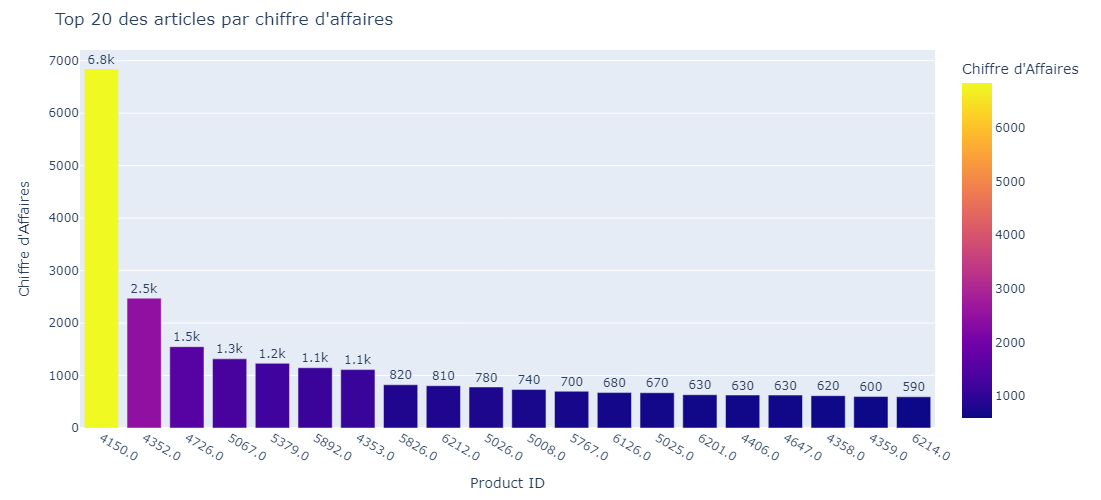

In [138]:
###############################
# Palmares des articles en CA #
###############################

# Effectuer le tri dans l'ordre décroissant du CA du dataset merged_df
df_trié = merged_df.sort_values(by='ca_par_article', ascending=False).copy()

# Réinitialiser l'index du dataset par un reset_index
df_trié = df_trié.reset_index(drop=True)

# Afficher les top 20 premiers articles en CA
top_20_articles = df_trié.head(20).copy()  
#print(top_20_articles)

top_20_articles ["product_id"] =top_20_articles ["product_id"].astype(str)

# Graphique en barre des 20 premiers articles avec plotly express

fig = px.bar(top_20_articles, 
             x='product_id', 
             y='ca_par_article', 
             title='Top 20 des articles par chiffre d\'affaires',
             labels={'product_id': 'Product ID', 'ca_par_article': 'Chiffre d\'Affaires'},
             color='ca_par_article', 
             color_continuous_scale=px.colors.sequential.Plasma,
             text='ca_par_article')  # Ajout des étiquettes de données

# Mise à jour des étiquettes (position et format)
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')

# Ajustement des marges pour éviter que les étiquettes soient coupées
fig.update_layout(
    margin=dict(t=50, b=50),
    height=500  # Ajuste la hauteur si nécessaire
)

# Afficher le graphique
fig.show()

In [139]:
#############################
# Calculer le 20 / 80 en CA #
#############################

# Créer une colonne calculant la part du CA de chaque ligne dans le dataset (en pourcentage)
merged_df['part_ca'] = (merged_df['ca_par_article'] / total_ca) * 100

#Créer une colonne réalisant la somme cumulative de la colonne 'part_ca'
merged_df['total_part_ca'] = merged_df['part_ca'].cumsum()

#Grâce aux deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% du CA
#Déterminer le seuil de 80% du CA
threshold = 80

# le nombre d'articles nécessaires pour atteindre ou dépasser 80% du CA
articles_80_percent = merged_df[merged_df['total_part_ca'] <= threshold]
number_of_articles = len(articles_80_percent)

# Calculer la proportion des articles représentant 80% du CA par rapport au nombre total d'articles
total_articles = len(merged_df)
proportion_articles = (number_of_articles / total_articles) * 100

# Afficher les résultats
print(f"Le nombre d'articles représentant 80% du CA est : {number_of_articles}")
print(f"Ces articles représentent {proportion_articles:.2f}% du catalogue total.")


Le nombre d'articles représentant 80% du CA est : 540
Ces articles représentent 65.53% du catalogue total.


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.2 - Analyse des ventes en Quantités</h3>
</div>

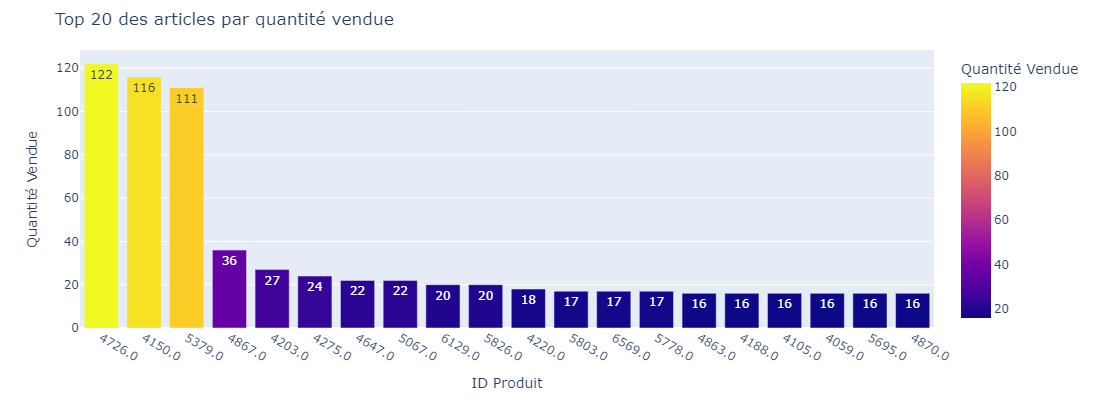

In [140]:
#####################################
# Palmares des articles en quantité #
#####################################

#Effectuer le tri dans l'ordre décroissant de quantités vendues du dataset merged_df
df_sorted_quantity = merged_df.sort_values(by='total_sales', ascending=False).copy()

#Réinitialiser l'index du dataset par un reset_index
df_sorted_quantity = df_sorted_quantity.reset_index(drop=True)

#Afficher les 20 premier articles en quantité
top_20_quantity = df_sorted_quantity.head(20).copy()
#print(top_20_quantity)

top_20_quantity  ["product_id"] =top_20_quantity ["product_id"].astype(str)

# Graphique en barre des 20 premiers articles avec plotly express 

fig = px.bar(
    top_20_quantity, 
    x='product_id', 
    y='total_sales',
    title='Top 20 des articles par quantité vendue',
    labels={'product_id': 'ID Produit', 'total_sales': 'Quantité Vendue'},
    color='total_sales', 
    color_continuous_scale=px.colors.sequential.Plasma,
    text='total_sales'  # Ajout des étiquettes de données
)

# Affichage automatique des étiquettes avec ajustement
fig.update_traces(texttemplate='%{text:.0f}', textposition='inside', textfont_size=12)

# Ajustement des marges du graphique pour éviter les étiquettes coupées
fig.update_layout(
    margin=dict(t=50, b=50),
    height=400  # Augmente la hauteur si nécessaire
)

# Affichage du graphique
fig.show()

In [141]:
#############################
# Calculer le 20 / 80 en CA #
#############################

#Créer une colonne calculant la part en quantité de la ligne dans le dataset
total_quantity = merged_df['total_sales'].sum()
merged_df['part_quantity'] = (merged_df['total_sales'] / total_quantity) * 100

#Créer une colonne réalisant la somme cumulative de la colonne précedemment créée
merged_df['cumulative_part_quantity'] = merged_df['part_quantity'].cumsum()

# Afficher le DataFrame avec les nouvelles colonnes
#print(merged_df)

#Grâce au deux colonnes créées précedemment, calculer le nombre d'articles représentant 80% des ventes en quantité
#Déterminer le seuil de 80% des ventes en quantité
threshold = 80

# Trouver le nombre d'articles nécessaires pour atteindre ou dépasser 80% du total des ventes en quantité
articles_80_percent = merged_df[merged_df['cumulative_part_quantity'] <= threshold]
number_of_articles = len(articles_80_percent)
print(f"Le nombre d'articles représentant 80% des ventes en quantité est : {number_of_articles}")

#Afficher la proportion que représentent ce groupe d'articles dans le catalogue entier du site web
quantity_80_percent_group = articles_80_percent['total_sales'].sum()

# Calculer la proportion de cette somme par rapport au total des quantités vendues
proportion_80_percent_group = (quantity_80_percent_group / total_quantity) * 100
print(f"La proportion des articles représentant 80% des ventes en quantité dans le catalogue entier est : {proportion_80_percent_group:.2f}%")


Le nombre d'articles représentant 80% des ventes en quantité est : 587
La proportion des articles représentant 80% des ventes en quantité dans le catalogue entier est : 79.94%


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.3 - Analyse des stocks</h3>
</div>

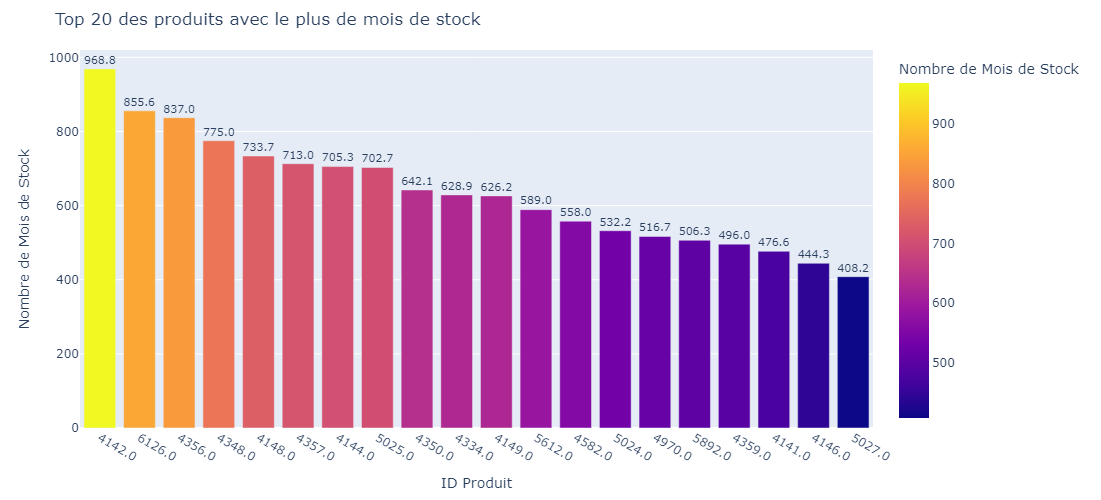

In [142]:
######################################
# Calcule le nombre de mois de stock #
######################################

import numpy as np

# merged_df contient les colonnes 'total_sales' et 'stock_quantity'
#Création de la colonne Rotation de stock

# 1. Calculer le stock moyen (ici, on peut considérer que le stock est constant)
merged_df['stock_moyen'] = merged_df['stock_quantity']  # En l'absence d'autres données, on utilise la quantité en stock comme stock moyen

# 2. Calculer la rotation de stock (quantité vendue / stock moyen)
merged_df['rotation_stock'] = merged_df['total_sales'] / merged_df['stock_moyen'].replace(0, float('nan'))

# 3. Remplacer les valeurs infinies par 0 (si stock_moyen était zéro)
merged_df['rotation_stock'] = merged_df['rotation_stock'].replace([float('inf'), -float('inf')], 0)

# 4. Effectuer le tri dans l'ordre décroissant du nombre de mois de stock dans le dataset merged_df
# Pour calculer la colonne 'mois_stock' il faut :
# 4.1. Calculer les ventes moyennes quotidiennes (total_sales / 31 jours pour le mois d'octobre) # calcule de la colonne 'mois_stock'
merged_df['sales_par_jour'] = (merged_df['total_sales'] / 31).replace(0, np.nan)

# 4.2. Calculer le nombre de mois de stock
merged_df['mois_stock'] = merged_df['stock_quantity'] / merged_df['sales_par_jour']

# 4.3. Remplacer les valeurs infinies par 0 (cas où stock_quantity est 0 ou total_sales est 0)
merged_df['mois_stock'] = merged_df['mois_stock'].replace([np.inf, -np.inf], 0)

# 4.4. Effectuer le tri dans l'ordre décroissant du nombre de mois de stock
df_trié_stock = merged_df.sort_values(by='mois_stock', ascending=False).copy()

# 5. Afficher le DataFrame trié
#print(df_trié_stock)

# 6. Afficher le flop 20 des produits ayant le plus de mois de stock
top_20_mois_stock = df_trié_stock.head(20).copy()
top_20_mois_stock["product_id"] =top_20_mois_stock ["product_id"].astype(str)
#print(top_20_mois_stock )

# Graphique en barre des 20 premiers produits avec plotly express

fig = px.bar(
    top_20_mois_stock, 
    x='product_id', 
    y='mois_stock', 
    title='Top 20 des produits avec le plus de mois de stock',
    labels={'product_id': 'ID Produit', 'mois_stock': 'Nombre de Mois de Stock'},
    color='mois_stock', 
    color_continuous_scale=px.colors.sequential.Plasma,
    text='mois_stock'  # Ajout des étiquettes de données
)

# Ajustement des étiquettes avec des options supplémentaires
fig.update_traces(texttemplate='%{text:.1f}', textposition='outside', textfont_size=12)

# Ajustement des marges du graphique pour éviter que les étiquettes soient coupées
fig.update_layout(
    margin=dict(t=50, b=50),
    height=500  # Ajustement de la hauteur du graphique si nécessaire
)

# Afficher le graphique
fig.show()

In [143]:
####################################
# Valorisation des stocks en euros #
####################################

#Création de la colonne Valorisation des stocks en euros
merged_df['valorisation_stock_euros'] = merged_df['stock_quantity'] * merged_df['price']

#Calculer la somme de la colonne "Valorisation_stock_euros"
somme_valorisation = merged_df['valorisation_stock_euros'].sum()
print(f"La somme de la colonne 'valorisation_stock_euros' est : {somme_valorisation:,.2f} €")


La somme de la colonne 'valorisation_stock_euros' est : 531,946.20 €


In [144]:
##############################################
# Valorisation du nombre de produit en stock #
##############################################

#Calculer la somme de la colonne stock quantity
merged_df['stock_quantity'].sum()

17803.0

## Analyse des trois dataframes (top_20_articles, top_20_quantity et top_20_mois_stock)

In [145]:
# Sélectionner les colonnes d'intérêt la DataFrame top_20_articles
selected_columns_articles = top_20_articles[['product_id', 'post_name','stock_quantity', 'total_sales', 'ca_par_article', 'product_type']]

# Afficher les résultats
selected_columns_articles.head(20)

,product_id,post_name,stock_quantity,total_sales,ca_par_article,product_type
0,4150.0,champagne-mailly-grand-cru-intemporelle-2010,123.0,116.0,6844.0,Champagne
1,4352.0,champagne-egly-ouriet-grand-cru-millesime-2008,0.0,11.0,2475.0,Champagne
2,4726.0,francois-baur-pinot-noir-schlittweg-2017,0.0,122.0,1549.4,Vin
3,5067.0,albert-mann-pinot-noir-grand-h-2017,3.0,22.0,1317.8,Vin
4,5379.0,argentine-mendoza-alamos-torrontes-2017,33.0,111.0,1232.1,Vin
5,5892.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,98.0,6.0,1147.8,Champagne
6,4353.0,champagne-egly-ouriet-grand-cru-brut-rose,127.0,14.0,1113.0,Champagne
7,5826.0,agnes-levet-amethyste-2017,34.0,20.0,824.0,Vin
8,6212.0,domaine-des-comtes-lafon-volnay-1er-cru-santen...,16.0,7.0,805.0,Vin
9,5026.0,champagne-agrapart-fils-mineral-extra-brut-bla...,101.0,9.0,781.2,Champagne


In [146]:
# Sélectionner les colonnes d'intérêt pour la DataFrame tope_20_quantity
selected_columns_quantity = top_20_quantity[['product_id', 'post_name','stock_quantity', 'total_sales', 'ca_par_article', 'product_type']]

# Afficher les résultats
selected_columns_quantity.head(20)

,product_id,post_name,stock_quantity,total_sales,ca_par_article,product_type
0,4726.0,francois-baur-pinot-noir-schlittweg-2017,0.0,122.0,1549.4,Vin
1,4150.0,champagne-mailly-grand-cru-intemporelle-2010,123.0,116.0,6844.0,Champagne
2,5379.0,argentine-mendoza-alamos-torrontes-2017,33.0,111.0,1232.1,Vin
3,4867.0,chateau-de-la-selve-igp-coteaux-de-lardeche-ma...,121.0,36.0,356.4,Vin
4,4203.0,mas-laval-igp-pays-herault-pampres-blanc-2018,74.0,27.0,267.3,Vin
5,4275.0,i-fabbri-chianti-classico-lamole-2017,62.0,24.0,357.6,Vin
6,4647.0,bernard-baudry-chinon-rouge-croix-boissee-2017,45.0,22.0,627.0,Vin
7,5067.0,albert-mann-pinot-noir-grand-h-2017,3.0,22.0,1317.8,Vin
8,6129.0,moulin-de-gassac-igp-pays-dherault-guilhem-bla...,68.0,20.0,104.0,Vin
9,5826.0,agnes-levet-amethyste-2017,34.0,20.0,824.0,Vin


In [147]:
#Sélectionner les colonnes d'intérêt pour la DataFrame tope_20_mois_stock
selected_columns_mois_stock = top_20_mois_stock[['product_id','post_name','mois_stock','stock_quantity','total_sales','ca_par_article','product_type']]

# Afficher les résultats
selected_columns_mois_stock.head(20)
                                

,product_id,post_name,mois_stock,stock_quantity,total_sales,ca_par_article,product_type
58,4142.0,champagne-gosset-grand-millesime-2006,968.750000,125.0,4.0,212.0,Champagne
260,6126.0,champagne-gosset-celebris-vintage-2007,855.600000,138.0,5.0,675.0,Champagne
78,4356.0,champagne-egly-ouriet-premier-cru-vrigny,837.000000,81.0,3.0,154.8,Champagne
79,4348.0,champagne-egly-ouriet-tradition-grand-cru,775.000000,125.0,5.0,295.0,Champagne
15,4148.0,champagne-mailly-grand-cru-brut-rose,733.666667,71.0,3.0,112.5,Champagne
39,4357.0,champagne-larmandier-bernier-latitude,713.000000,115.0,5.0,195.0,Champagne
17,4144.0,champagne-gosset-grand-rose,705.250000,91.0,4.0,196.0,Champagne
153,5025.0,champagne-agrapart-fils-lavizoise-grand-cru-20...,702.666667,136.0,6.0,672.0,Champagne
81,4350.0,champagne-egly-ouriet-extra-brut-vp,642.142857,145.0,7.0,556.5,Champagne
33,4334.0,champagne-gosset-grand-blanc-de-blanc,628.857143,142.0,7.0,343.0,Champagne


In [148]:
# Trouver les produits communs aux deux DataFrames (top_20_articles et top_20_quantity )
produits_communs = set(top_20_articles['product_id']).intersection(
    set(top_20_quantity['product_id'])
)

#  Filtrer les DataFrames pour afficher uniquement les produits communs
articles_communs = top_20_articles[top_20_articles['product_id'].isin(produits_communs)]
quantity_communs = top_20_quantity[top_20_quantity['product_id'].isin(produits_communs)]

# Sélectionner les colonnes d'intérêt pour les deux DataFrames
select_columns_articles_communs = articles_communs[['product_id', 'post_name','stock_quantity', 'total_sales', 'ca_par_article', 'product_type']] 
select_columns_quantity_communs = quantity_communs[['product_id', 'post_name','stock_quantity', 'total_sales', 'ca_par_article', 'product_type']] 

#  Afficher les résultats
print("Articles communs dans les deux DataFrames (top_20_articles et top_20_quantity ) :\n")
select_columns_articles_communs.head(20)
select_columns_quantity_communs.head(20)


Articles communs dans les deux DataFrames (top_20_articles et top_20_quantity ) :



,product_id,post_name,stock_quantity,total_sales,ca_par_article,product_type
0,4726.0,francois-baur-pinot-noir-schlittweg-2017,0.0,122.0,1549.4,Vin
1,4150.0,champagne-mailly-grand-cru-intemporelle-2010,123.0,116.0,6844.0,Champagne
2,5379.0,argentine-mendoza-alamos-torrontes-2017,33.0,111.0,1232.1,Vin
6,4647.0,bernard-baudry-chinon-rouge-croix-boissee-2017,45.0,22.0,627.0,Vin
7,5067.0,albert-mann-pinot-noir-grand-h-2017,3.0,22.0,1317.8,Vin
9,5826.0,agnes-levet-amethyste-2017,34.0,20.0,824.0,Vin


In [149]:
#  Trouver les produits communs aux deux DataFrames (top_20_articles et top_20_mois_stock )
produits_communs = set(top_20_articles['product_id']).intersection(
    set(top_20_mois_stock['product_id'])
)

#  Filtrer les DataFrames pour afficher uniquement les produits communs
articles_communs = top_20_articles[top_20_articles['product_id'].isin(produits_communs)]
mois_stock_communs = top_20_mois_stock[top_20_mois_stock['product_id'].isin(produits_communs)]

# Sélectionner les colonnes d'intérêt pour les deux DataFrames
select_columns_articles_communs = articles_communs[['product_id', 'post_name','stock_quantity', 'total_sales', 'ca_par_article', 'product_type']] 
select_columns_mois_stock_communs = mois_stock_communs[['product_id', 'post_name', 'mois_stock', 'stock_quantity', 'total_sales', 'ca_par_article', 'product_type']] 

#  Afficher les résultats
print("Articles communs dans les deux DataFrames (top_20_articles et top_20_mois_stock ) :\n")
select_columns_articles_communs.head(20)
select_columns_mois_stock_communs.head(20)


Articles communs dans les deux DataFrames (top_20_articles et top_20_mois_stock ) :



,product_id,post_name,mois_stock,stock_quantity,total_sales,ca_par_article,product_type
260,6126.0,champagne-gosset-celebris-vintage-2007,855.600000,138.0,5.0,675.0,Champagne
153,5025.0,champagne-agrapart-fils-lavizoise-grand-cru-20...,702.666667,136.0,6.0,672.0,Champagne
272,5892.0,coteaux-champenois-egly-ouriet-ambonnay-rouge-...,506.333333,98.0,6.0,1147.8,Champagne
146,4359.0,champagne-larmandier-bernier-grand-cru-vieille...,496.000000,112.0,7.0,599.2,Champagne


<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.4 - Analyse du taux de marge</h3>
</div>

In [150]:
############################
# Analyse du taux de marge #
############################

#Création de la colonne prix HT
# TVA sur le vin en France = (20%)
taux_tva = 0.20

#Calculer le prix HT
merged_df['prix_ht'] = merged_df['price'] / (1 + taux_tva)

#Création de la colonne Taux de marge
merged_df['taux_marge'] = ((merged_df['prix_ht'] - merged_df['purchase_price']) / merged_df['prix_ht']) * 100

#Afficher le prix minimum de la colonne "taux_marge"
merged_df['taux_marge'].min()
print(merged_df['taux_marge'].min())

#Afficher le prix maximum de la colonne "taux_marge"
merged_df['taux_marge'].max()


-634.98814229249


47.7568

In [151]:
#affichage de la ligne avec un taux de marge inférieur à 0
merged_df_négatif = merged_df[merged_df['taux_marge'] < 0]
#print(merged_df_négatif)

In [152]:
#création d'un dataframe avec les taux positifs
merged_df_positif = merged_df[merged_df['taux_marge'] > 0]

#Afficher le prix minimum de la colonne "taux_marge"
merged_df_positif['taux_marge'].min()
print(merged_df_positif['taux_marge'].min())

#Afficher le prix maximum de la colonne "taux_marge"
merged_df_positif['taux_marge'].max()
print(merged_df_positif['taux_marge'].max())

22.77862595419847
47.7568


    product_type  taux_marge
0          Autre         NaN
1      Champagne    4.792943
2         Cognac   45.067614
3            Gin   42.800000
4  Huile d'olive   24.998198
5            Vin   38.008504
6         Whisky   44.918865


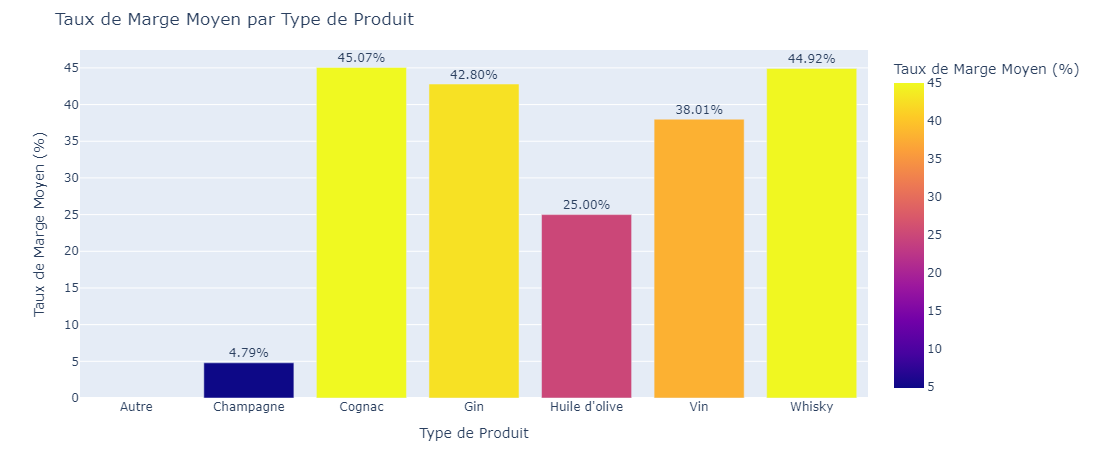

In [153]:
#création d'un dataframe avec le taux de marge moyen par type de produit

# Grouper par 'type_produit' et calculer la moyenne du taux de marge
df_moyenne_marge = merged_df.groupby('product_type')['taux_marge'].mean().reset_index()

print(df_moyenne_marge)

# Affichage dans un graphique du taux de marge par type de produit avec plotly express

fig = px.bar(df_moyenne_marge, 
             x='product_type', 
             y='taux_marge', 
             title='Taux de Marge Moyen par Type de Produit',
             labels={'product_type': 'Type de Produit', 'taux_marge': 'Taux de Marge Moyen (%)'},
             color='taux_marge', 
             color_continuous_scale=px.colors.sequential.Plasma,
             text='taux_marge'  # Ajout des étiquettes de données
)

# Affichage automatique des étiquettes avec ajustement
fig.update_traces(texttemplate='%{text:.2f}%', textposition='outside')

# Ajustement des marges du graphique si nécessaire
fig.update_layout(
    margin=dict(t=50, b=50),
    height=450  # Ajuste la hauteur si nécessaire
)

# Afficher le graphique
fig.show()

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.5 - Analyse des correlations entre les variables stock, sales et price</h3>
</div>

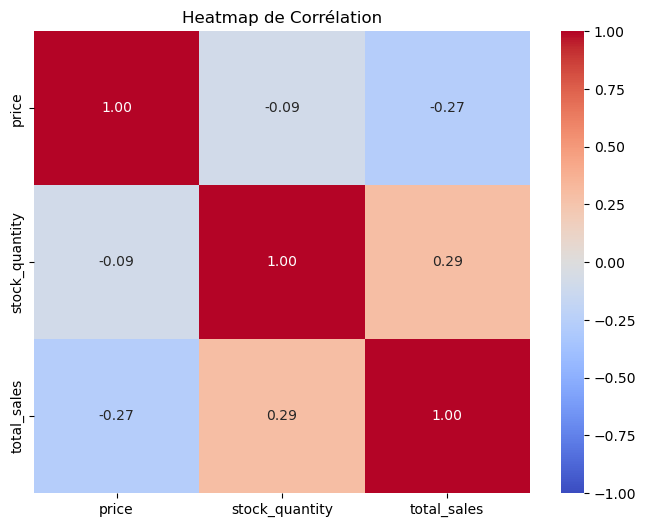

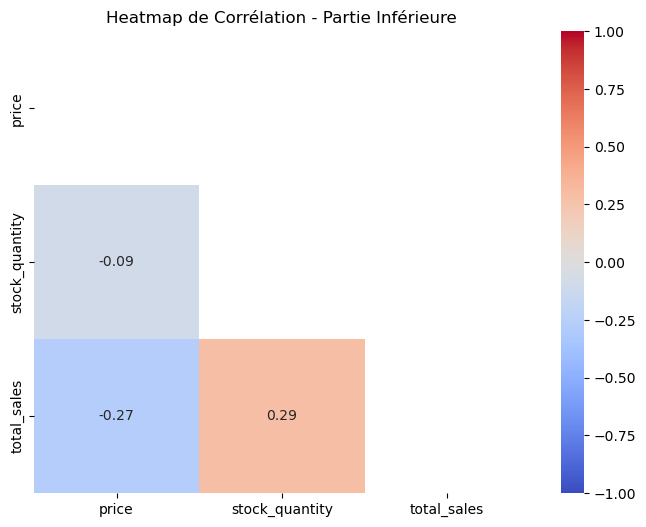

In [154]:
############################
# Analyse des correlations #
############################

#Importation de Seaborn
import seaborn as sns

#Création d'un heatmap de correlation avec les variables stock, sales et price
# 1. Remplacer les valeurs non numériques par NaN
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')

# 2. Sélectionner les colonnes d'intérêt
selected_columns = merged_df[['price', 'stock_quantity', 'total_sales']]

#print(selected_columns)

# 3. Calculer la matrice de corrélation
corr_matrix = selected_columns.corr()

# 4. Création de la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

# Personnalisation du graphique
plt.title('Heatmap de Corrélation')
plt.show()

# 5. Créer un masque pour n'afficher que la partie inférieure de la heatmap
mask_lower = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Création de la heatmap avec le masque
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, mask=mask_lower, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

# Personnalisation du graphique
plt.title('Heatmap de Corrélation - Partie Inférieure')
plt.show()

In [155]:
#Que peut-on conclure des correlations ?

On constate une petite corrélation positive (0.29) entre les colonnes 'total_sales' et 'stock_quantity' 
,une autre petite corrélation négative (-0.27) entre 'total_sales' et 'price' et une corrélation négative quasi nulle (-0.09) entre Price et Stock_quantity.
Sinon on peut conclure que les variables  stock, sales et price ne sont pas vraiment corrolées.

<div style="border: 1px solid RGB(51,165,182);" >
<h3 style="margin: auto; padding: 20px; color: RGB(51,165,182); ">Etape 5.6 - Mettre à disposition la nouvelle table sur un fichier Excel</h3>
</div>

In [156]:
#Mettre le dataset merged_df sur un fichier Excel
#Cette étape peut-être utile pour partager le résultat du dataset obtenu pour le partager avec les équipes.  
merged_df.to_excel("merged_df.xlsx", index=False)